In [3]:
# Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). 

In [128]:
!pip install scikit-learn
import sklearn as sl
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
original_data = pd.read_csv("diabetic_data_edited.csv")
original_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [130]:
Trimmed = original_data[['num_lab_procedures','num_procedures', 'num_medications', 'number_diagnoses']] #we don't need all the columns
df = pd.DataFrame(Trimmed).replace({'?':np.nan}).dropna() #dropping "?" from data
df.head()


,num_lab_procedures,num_procedures,num_medications,number_diagnoses
0,41,0,1,1
1,59,0,18,9
2,11,5,13,6
3,44,1,16,7
4,51,0,8,5


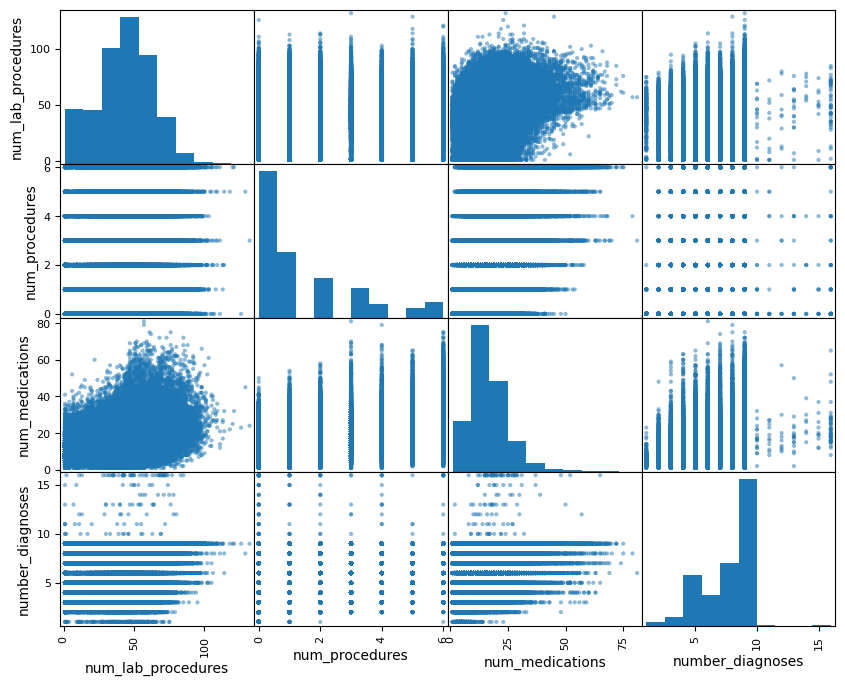

In [131]:
visuals = pd.plotting.scatter_matrix(df, figsize = (10,8)) #trying to see potential relationships to determine what data would be good to use for this exercise
#I think num_lab_procedures x num_medications will be best.

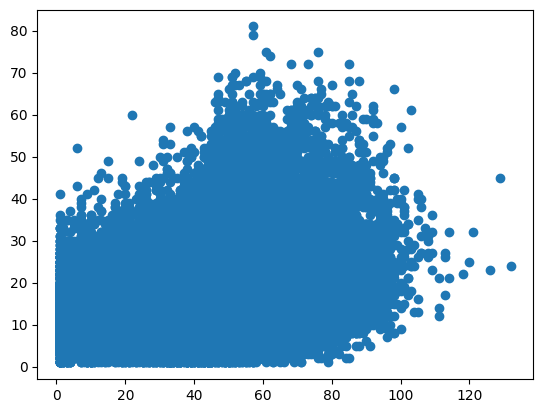

In [132]:
best = df[['num_lab_procedures','num_medications']] #here is the data we wil use
best.head()
plt.scatter(best["num_lab_procedures"], best["num_medications"])

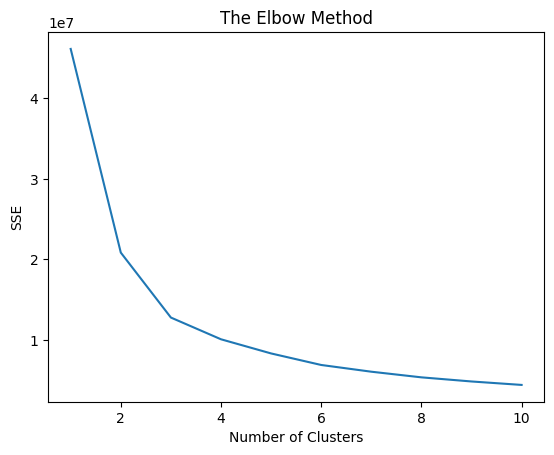

In [133]:
# Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points).
# Calculate the sum of least square error for each different values of 'k'. 

Potential_Clusters = [1,2,3,4,5,6,7,8,9,10]
SSE = [] #Sum of squared errors
for k in Potential_Clusters:
    k_means = cluster.KMeans(n_clusters = k)
    k_means.fit(best)
    SSE.append(k_means.inertia_)
    
    
plt.plot(Potential_Clusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()

#The elbow method estimates the optimal number of clusters k. 
#If k increases, the SSE (“distortion”) will decrease because the samples will be closer to the centroids they are assigned to.
#The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly.
#As we can see in the resulting plot, the elbow is located at k = 3 (SSE appears to decrease linearly after this point), indicating that 3 clusters is a good choice for this dataset.

In [136]:
kmeans = KMeans(n_clusters = 3).fit(best)
centroids = kmeans.cluster_centers_
print(centroids) #obtaining centroids. You will notice these change slightly each time the code is executed.

[[41.08933617 14.97172671]
 [64.20120311 19.14712373]
 [13.33594176 13.42330741]]


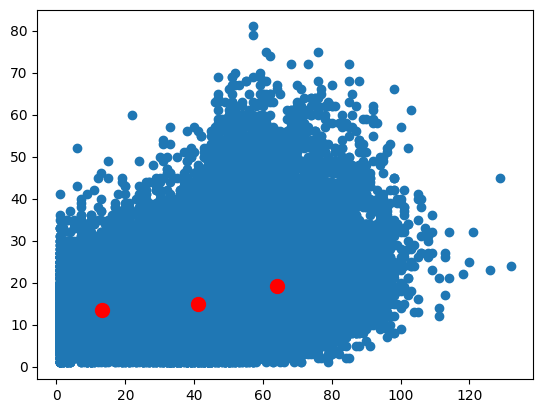

In [137]:
# Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). 
 
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
label = kmeans.fit_predict(best)

plt.scatter(best["num_lab_procedures"], best["num_medications"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show() #showing centroids only 

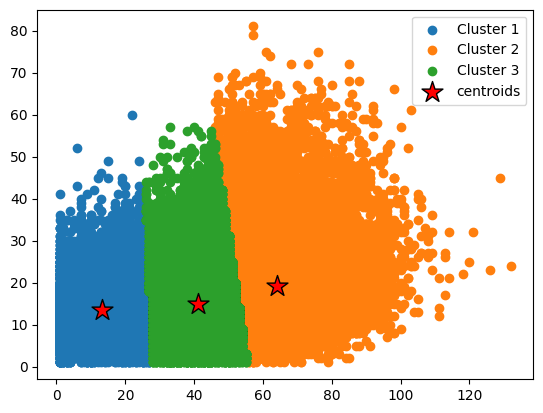

In [138]:
filter1 = best[label == 0] #getting a mask for this cluster
plt.scatter(filter1["num_lab_procedures"], filter1["num_medications"], label = "Cluster 1") #applying the mask so that only points in this cluster are plotted together

filter2 = best[label == 1]
plt.scatter(filter2["num_lab_procedures"], filter2["num_medications"], label = "Cluster 2")

filter3 = df[label == 2]
plt.scatter(filter3["num_lab_procedures"], filter3["num_medications"], label = "Cluster 3")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')

plt.legend()
plt.show() #showing clusters

#The optimal amount of clusters is 3 per the elbow method shown above. Thus, there are 3 centroids, shown as stars.
#The tool looks like it did a pretty good job clustering the points. 